# Telco customer churn prediction

## Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

## Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Data Source: https://www.kaggle.com/blastchar/telco-customer-churn

In [1]:
import pandas as pd

data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [2]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [3]:
data.groupby(['Churn']).mean()

,SeniorCitizen,tenure,MonthlyCharges
Churn,,,
No,0.128721,37.569965,61.265124
Yes,0.254682,17.979133,74.441332


In [4]:
data.groupby('Contract')['Churn'].value_counts()

Contract        Churn
Month-to-month  No       2220
                Yes      1655
One year        No       1307
                Yes       166
Two year        No       1647
                Yes        48
Name: Churn, dtype: int64

In [5]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no NAs or null values

In [8]:
data.isin([' ']).sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are 11 values in TotalCharges that are just spaces with no meaning for TotalCharges. We can substitute them with NAs.

In [9]:
import numpy as np

data = data.replace(' ', np.nan)

In [12]:
data.isin([' ']).sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
data = data.dropna()

In [14]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
data["TotalCharges"] = data["TotalCharges"].astype(float)

In [16]:
data['tenure']

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7032, dtype: int64

In [17]:
# just yes and no
categories_no = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for el in categories_no : 
    data[el]  = data[el].replace({'No internet service' : 'No'})
    
data["SeniorCitizen"] = data["SeniorCitizen"].replace({1:"Yes",0:"No"})

In [18]:
# separating categorical and numerical features
Id_col     = ['customerID']
target_col = ["Churn"]
threshold_numerical = 40
cat_features = data.nunique()[data.nunique() < threshold_numerical].keys().tolist()
cat_features = cat_features[:-1]
bin_features   = data.nunique()[data.nunique() == 2].keys().tolist()
num_features   = [x for x in data.columns if x not in cat_features + ['Churn'] + ['customerID']]
multi_features = [i for i in cat_features if i not in bin_features]

# Feature scaling and encoding

In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# label encoder for binary features
label_enc = LabelEncoder()
for feat in bin_features :
    data[feat] = label_enc.fit_transform(data[feat])
    
# dummies for cat features
data = pd.get_dummies(data = data,columns = multi_features )

# scaling numerical features
std = StandardScaler()
data_scaled = std.fit_transform(data[num_features])
data_scaled = pd.DataFrame(data_scaled,columns=num_features)

data_copy = data.copy()
data = data.drop(columns = num_features,axis = 1)
data = data.merge(data_scaled,left_index=True,right_index=True,how = "left")

## There is no redundant information in the scaled dataframe

No features need to be removed.

In [20]:
data.corr()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
gender,1.000000,-0.001819,-0.001379,0.010349,-0.007515,-0.016328,-0.013093,-0.000807,-0.008507,-0.007124,...,-0.003251,0.007755,-0.003603,-0.015973,0.001632,0.000844,0.013199,0.018568,0.006789,0.021080
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.008392,-0.038576,0.066663,0.059514,-0.060577,0.105445,...,0.137752,-0.046491,-0.116205,-0.016235,-0.024359,0.171322,-0.152987,-0.004482,-0.001729,-0.005051
Partner,-0.001379,0.016957,1.000000,0.452269,0.018397,0.143346,0.141849,0.153556,0.120206,0.124483,...,-0.280202,0.083067,0.247334,0.111406,0.082327,-0.083207,-0.096948,0.037100,-0.003828,0.026933
Dependents,0.010349,-0.210550,0.452269,1.000000,-0.001078,0.080786,0.023639,0.013900,0.063053,-0.016499,...,-0.229715,0.069222,0.201699,0.052369,0.061134,-0.149274,0.056448,0.021078,-0.000263,0.011245
PhoneService,-0.007515,0.008392,0.018397,-0.001078,1.000000,-0.091676,-0.052133,-0.070076,-0.095138,-0.021383,...,-0.001243,-0.003142,0.004442,0.008271,-0.006916,0.002747,-0.004463,-0.006858,0.023473,0.004607
OnlineSecurity,-0.016328,-0.038576,0.143346,0.080786,-0.091676,1.000000,0.283285,0.274875,0.354458,0.175514,...,-0.246844,0.100658,0.191698,0.094366,0.115473,-0.112295,-0.079918,0.038997,0.011360,0.033045
OnlineBackup,-0.013093,0.066663,0.141849,0.023639,-0.052133,0.283285,1.000000,0.303058,0.293705,0.281601,...,-0.164393,0.084113,0.111391,0.086942,0.090455,-0.000364,-0.174075,0.026703,0.026299,0.038774
DeviceProtection,-0.000807,0.059514,0.153556,0.013900,-0.070076,0.274875,0.303058,1.000000,0.332850,0.389924,...,-0.225988,0.102911,0.165248,0.083047,0.111252,-0.003308,-0.187325,0.040849,0.022264,0.045104
TechSupport,-0.008507,-0.060577,0.120206,0.063053,-0.095138,0.354458,0.293705,0.332850,1.000000,0.277549,...,-0.285491,0.096258,0.240924,0.100472,0.117024,-0.114807,-0.084631,0.049112,0.021769,0.051561
StreamingTV,-0.007124,0.105445,0.124483,-0.016499,-0.021383,0.175514,0.281601,0.389924,0.277549,1.000000,...,-0.112550,0.061930,0.072124,0.046121,0.040010,0.144747,-0.247712,0.044856,0.059850,0.066076


# Feature engineering

Create new features using embeddings from FastAI

Create new features using automatic methods such as Autofeat

In [21]:
data.isna().sum()
data = data.dropna()

# Modeling

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score

#splitting train and test data 
train,test = train_test_split(data,test_size = .25 ,random_state = 256)
    
##seperating dependent and independent variables
cols    = [i for i in data.columns if i not in Id_col + target_col]
train_X = train[cols]
train_Y = train[target_col]
test_X  = test[cols]
test_Y  = test[target_col]

#Function attributes
#dataframe     - processed dataframe
#Algorithm     - Algorithm used 
#training_x    - predictor variables dataframe(training)
#testing_x     - predictor variables dataframe(testing)
#training_y    - target variable(training)
#training_y    - target variable(testing)
#cf - ["coefficients","features"](cooefficients for logistic 
                                 #regression,features for tree based models)

#threshold_plot - if True returns threshold plot for model
    
def churn_prediction(algorithm,training_x,testing_x,
                             training_y,testing_y,cols,cf) :
    
    #model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    #coeffs
    if   cf == "coefficients" :
        coefficients  = pd.DataFrame(algorithm.coef_.ravel())
    elif cf == "features" :
        coefficients  = pd.DataFrame(algorithm.feature_importances_)
        
    column_df     = pd.DataFrame(cols)

    if cf in ['coefficients','features']:
        coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                                right_index= True, how = "left"))
        coef_sumry.columns = ["coefficients","features"]
        coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    
    accuracy = accuracy_score(testing_y,predictions)

    print (algorithm)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy   Score : ",accuracy)
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc,"\n")

    return predictions,probabilities,accuracy,model_roc_auc

## Data Oversampling

In [23]:
# Data undersampling

#from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

cols    = [i for i in data.columns if i not in Id_col+target_col]

under_X = data[cols]
under_Y = data[target_col]

#Split train and test data
under_train_X,under_test_X,under_train_Y,under_test_Y = train_test_split(under_X,under_Y,
                                                                         test_size = .1 ,
                                                                         random_state = 256)

#oversampling minority class using smote
#under_sampler = NearMiss(random_state = 256)
under_sampler = SMOTE(random_state=256)
under_sampled_X, under_sampled_Y = under_sampler.fit_sample(under_train_X,under_train_Y)
under_sampled_X = pd.DataFrame(data = under_sampled_X,columns=cols)
under_sampled_Y = pd.DataFrame(data = under_sampled_Y,columns=target_col)
###

Using TensorFlow backend.
/Users/jacopoparvizi/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/jacopoparvizi/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/jacopoparvizi/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/jacopoparvizi/minicond

## Base line - Logistic regression

In [24]:
logit = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# here it is important to test on the original test set
churn_prediction(logit,under_sampled_X,test_X,under_sampled_Y,test_Y,
                         cols,"coefficients")

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.89      0.71      0.79      1294
           1       0.48      0.76      0.59       462

    accuracy                           0.72      1756
   macro avg       0.69      0.73      0.69      1756
weighted avg       0.78      0.72      0.74      1756

Accuracy   Score :  0.7238041002277904
Area under curve :  0.734661139993443 

/Users/jacopoparvizi/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = colu

(array([0, 0, 0, ..., 1, 1, 0]), array([[0.74150415, 0.25849585],
        [0.9714123 , 0.0285877 ],
        [0.95780721, 0.04219279],
        ...,
        [0.32710614, 0.67289386],
        [0.10457497, 0.89542503],
        [0.83071047, 0.16928953]]), 0.7238041002277904, 0.734661139993443)

## KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
churn_prediction(knn,under_sampled_X,test_X,under_sampled_Y,test_Y,
                         cols,"NA")

/Users/jacopoparvizi/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=5, p=2,
                     weights='uniform')

 Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.70      0.80      1294
           1       0.51      0.86      0.64       462

    accuracy                           0.74      1756
   macro avg       0.72      0.78      0.72      1756
weighted avg       0.82      0.74      0.76      1756

Accuracy   Score :  0.7431662870159453
Area under curve :  0.7805037569334323 



(array([1, 0, 0, ..., 0, 1, 0]), array([[0.2, 0.8],
        [1. , 0. ],
        [1. , 0. ],
        ...,
        [1. , 0. ],
        [0. , 1. ],
        [0.6, 0.4]]), 0.7431662870159453, 0.7805037569334323)

## Random Forests

In [60]:
from imblearn.ensemble import BalancedRandomForestClassifier

bal_rf = BalancedRandomForestClassifier(n_estimators=100,sampling_strategy='auto')
churn_prediction(bal_rf,train_X,test_X,train_Y,test_Y,
                         cols,"features")

/Users/jacopoparvizi/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
BalancedRandomForestClassifier(bootstrap=True, class_weight=None,
                               criterion='gini', max_depth=None,
                               max_features='auto', max_leaf_nodes=None,
                               min_impurity_decrease=0.0, min_samples_leaf=2,
                               min_samples_split=2,
                               min_weight_fraction_leaf=0.0, n_estimators=100,
                               n_jobs=1, oob_score=False, random_state=None,
                               replacement=False, sampling_strategy='auto',
                               verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.89      0.69      0.78      1

(array([0, 0, 0, ..., 0, 1, 0]), array([[0.63771214, 0.36228786],
        [0.88666667, 0.11333333],
        [0.97535714, 0.02464286],
        ...,
        [0.55520066, 0.44479934],
        [0.08643563, 0.91356437],
        [0.74566306, 0.25433694]]), 0.7078587699316629, 0.7245378269334992)

In [61]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators=500)
churn_prediction(rf,under_sampled_X,test_X,under_sampled_Y,test_Y,
                         cols,"features")

/Users/jacopoparvizi/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.93      0.93      1294
           1       0.80      0.78      0.79       462

    accuracy                           0.89      1756
   macro avg       0.8

(array([0, 0, 0, ..., 0, 1, 0]), array([[0.796, 0.204],
        [0.972, 0.028],
        [0.978, 0.022],
        ...,
        [0.936, 0.064],
        [0.038, 0.962],
        [0.958, 0.042]]), 0.8912300683371298, 0.8559167519754847)

## LGBM

In [27]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                        learning_rate=0.5, max_depth=7, min_child_samples=20,
                        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
                        n_jobs=-1, num_leaves=500, objective='binary', random_state=None,
                        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
                        subsample_for_bin=200000, subsample_freq=0)

cols = [i for i in data.columns if i not in Id_col + target_col]
churn_prediction(lgbm,under_sampled_X,test_X,under_sampled_Y,test_Y,
                         cols,"features")

/Users/jacopoparvizi/miniconda3/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)
/Users/jacopoparvizi/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Use

(array([0, 0, 0, ..., 0, 1, 0]), array([[8.87092163e-01, 1.12907837e-01],
        [9.92930305e-01, 7.06969479e-03],
        [9.99823700e-01, 1.76299759e-04],
        ...,
        [9.94850679e-01, 5.14932092e-03],
        [5.91151423e-02, 9.40884858e-01],
        [9.89792461e-01, 1.02075393e-02]]), 0.8838268792710706, 0.8536769773245817)

# XGBoost

In [28]:
from xgboost import XGBClassifier

xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bytree=1, gamma=0, learning_rate=0.9, max_delta_step=0,
                    max_depth = 7, min_child_weight=1, missing=None, n_estimators=500,
                    n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                    silent=True, subsample=1)


In [29]:
churn_prediction(xgb,under_sampled_X,test_X,under_sampled_Y,test_Y,
                         cols,"features")

/Users/jacopoparvizi/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jacopoparvizi/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.9, max_delta_step=0,
              max_depth=7, min_child_weight=1, missing=None, n_estimators=500,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

 Class

(array([0, 0, 0, ..., 0, 1, 0]), array([[9.8255581e-01, 1.7444184e-02],
        [9.9933726e-01, 6.6276436e-04],
        [9.9999070e-01, 9.3273084e-06],
        ...,
        [9.9989408e-01, 1.0593344e-04],
        [3.0274391e-03, 9.9697256e-01],
        [9.9617988e-01, 3.8201187e-03]], dtype=float32), 0.8866742596810934, 0.8570006757796558)

# Confusion Matrix

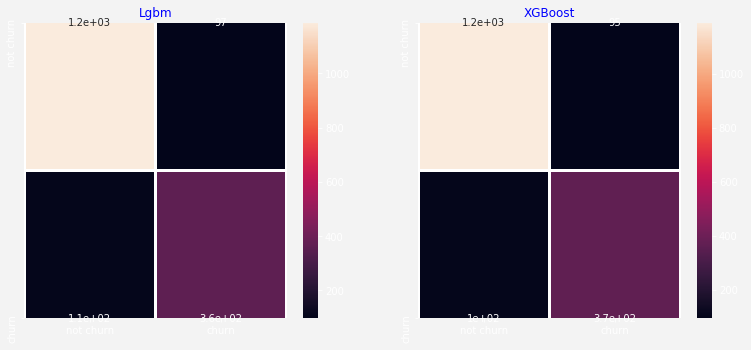

In [30]:
from matplotlib import pyplot as plt
import itertools
import seaborn as sns

lst    = [lgbm,xgb]

length = len(lst)

mods   = ['Lgbm','XGBoost']

fig = plt.figure(figsize=(20,25))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    plt.subplot(4,3,j+1)
    predictions = i.predict(test_X)
    conf_matrix = confusion_matrix(predictions,test_Y)
    sns.heatmap(conf_matrix,
                annot=True,
                xticklabels=["not churn","churn"],
                yticklabels=["not churn","churn"],
                linewidths = 2)
    plt.title(k,color = "b")
   # plt.subplots_adjust(wspace = .3,hspace = .3)

# ROC Curves

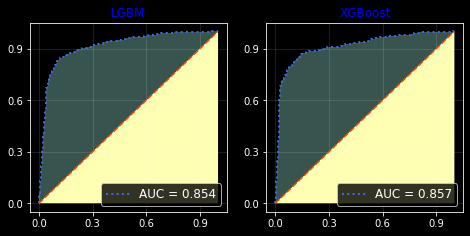

In [31]:
lst    = [lgbm,xgb]

length = len(lst)

mods   = ['LGBM',
          'XGBoost']

plt.style.use("dark_background")
fig = plt.figure(figsize=(12,16))
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    qx = plt.subplot(4,3,j+1)
    probabilities = i.predict_proba(test_X)
    predictions   = i.predict(test_X)
    fpr,tpr,thresholds = roc_curve(test_Y,probabilities[:,1])
    plt.plot(fpr,tpr,linestyle = "dotted",
             color = "royalblue",linewidth = 2,
             label = "AUC = " + str(np.around(roc_auc_score(test_Y,predictions),3)))
    plt.plot([0,1],[0,1],linestyle = "dashed",
             color = "orangered",linewidth = 1.5)
    plt.fill_between(fpr,tpr,alpha = .4)
    plt.fill_between([0,1],[0,1])
    plt.legend(loc = "lower right",
               prop = {"size" : 12})
    #qx.set_facecolor("k")
    plt.grid(True,alpha = .15)
    plt.title(k,color = "b")
    plt.xticks(np.arange(0,1,.3))
    plt.yticks(np.arange(0,1,.3))

In [32]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

# Precision Recall curves

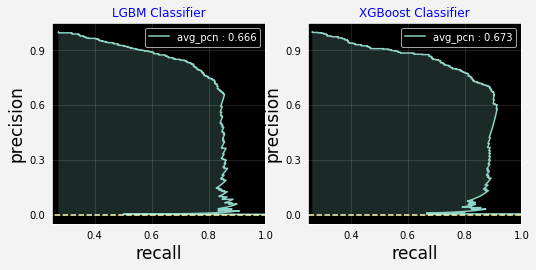

In [33]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score


lst    = [lgbm,xgb]

length = len(lst)

mods   = [ 'LGBM Classifier',
          'XGBoost Classifier']

plt.style.use("dark_background")
fig = plt.figure(figsize=(13,17))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    
    qx = plt.subplot(4,3,j+1)
    probabilities = i.predict_proba(test_X)
    predictions   = i.predict(test_X)
    recall,precision,thresholds = precision_recall_curve(test_Y,probabilities[:,1])
    plt.plot(recall,precision,linewidth = 1.5,
             label = ("avg_pcn : " + 
                      str(np.around(average_precision_score(test_Y,predictions),3))))
    plt.plot([0,1],[0,0],linestyle = "dashed")
    plt.fill_between(recall,precision,alpha = .2)
    plt.legend(loc = "upper right",
               prop = {"size" : 10})
    qx.set_facecolor("black")
    plt.grid(True,alpha = .15)
    plt.title(k,color = "b")
    plt.xlabel("recall",fontsize =17,color='k')
    plt.ylabel("precision",fontsize =17,color='k')
    plt.xlim([0.25,1])
    plt.yticks(np.arange(0,1,.3),color='k')
    plt.xticks(color='k')

# AutoML

In [38]:
from tpot import TPOTClassifier

tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2)
tpot.fit(under_sampled_X,under_sampled_Y)
print(tpot.score(test_X,test_Y))
tpot.export('tpot_model_churn.py')

/Users/jacopoparvizi/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
Generation 1 - Current best internal CV score: 0.8472001357735373
Generation 2 - Current best internal CV score: 0.8472001357735373
Generation 3 - Current best internal CV score: 0.8472001357735373
Generation 4 - Current best internal CV score: 0.8476315189896961
Generation 5 - Current best internal CV score: 0.8479525862068964

Best pipeline:RandomForestClassifier(input_matrix, bootstrap=True, criterion=gini, max_features=0.25, min_samples_leaf=2, min_samples_split=4, n_estimators=100)
/Users/jacopoparvizi/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

In [54]:
%load_ext autoreload
%autoreload

from supervised.automl import AutoML

automl = AutoML(total_time_limit=10*60,top_models_to_improve=3,
                learner_time_limit=240,algorithms=["Xgboost", "RF", "LightGBM"],
                start_random_models=10, hill_climbing_steps=4)
automl.fit(under_sampled_X,under_sampled_Y)

predictions = automl.predict(test_X)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



MLJAR AutoML:   0%|          | 0/54 [00:00<?, ?model/s]


MLJAR AutoML:   2%|▏         | 1/54 [00:08<07:39,  8.67s/model]







MLJAR AutoML:   0%|          | 0/80 [3:07:37<?, ?model/s]


MLJAR AutoML:   2%|▏         | 1/54 [00:08<07:39,  8.67s/model]Learner Xgboost final loss 0.33079227029642344 time 8.41 seconds



MLJAR AutoML:   4%|▎         | 2/54 [00:15<07:07,  8.22s/model]







MLJAR AutoML:   0%|          | 0/80 [3:07:44<?, ?model/s]


MLJAR AutoML:   4%|▎         | 2/54 [00:15<07:07,  8.22s/model]Learner Xgboost final loss 0.4766069852464874 time 6.95 seconds



MLJAR AutoML:   6%|▌         | 3/54 [00:20<06:07,  7.21s/model]







MLJAR AutoML:   0%|          | 0/80 [3:07:49<?, ?model/s]


MLJAR AutoML:   6%|▌         | 3/54 [00:20<06:07,  7.21s/model]Learner Xgboost final loss 0.47660964016273866 time 4.62 seconds



MLJAR AutoML:   7%|▋         | 4/54 [00:25<05:27,  6.56s/model]




In [62]:
accuracy = accuracy_score(test_Y.values,predictions['label'].values)

print ("\n Classification report : \n",classification_report(test_Y,predictions['label'].values))
print ("Accuracy   Score : ",accuracy)
#confusion matrix
conf_matrix = confusion_matrix(test_Y,predictions['label'].values)
#roc_auc_score
model_roc_auc = roc_auc_score(test_Y,predictions['label'].values) 
print ("Area under curve : ",model_roc_auc,"\n")


 Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.85      0.87      1294
           1       0.63      0.73      0.68       462

    accuracy                           0.82      1756
   macro avg       0.76      0.79      0.77      1756
weighted avg       0.83      0.82      0.82      1756

Accuracy   Score :  0.8171981776765376
Area under curve :  0.7882886047491922 



In [ ]:
# pickle automl model

from sklearn.externals import joblib

# save the model to disk
filename = 'automl_churn_telco1.model'
joblib.dump(model, filename)
 
 
# load the model from disk
loaded_model = joblib.load(filename)

# Second Dataset

This bank dataset is available here: https://www.kaggle.com/shrutimechlearn/churn-modelling/

In [ ]:
# Third Dataset
This dataset is available here: https://www.kaggle.com/mahreen/sato2015
